In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/air-passengers/AirPassengers.csv


In [4]:
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
%matplotlib inline


In [5]:
df=pd.read_csv('/kaggle/input/air-passengers/AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
df.shape

(144, 2)

In [7]:
df['Month']=pd.to_datetime(df['Month'], infer_datetime_format=True)
df2=df.set_index(['Month'])

In [8]:
df2.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [9]:
from datetime import datetime

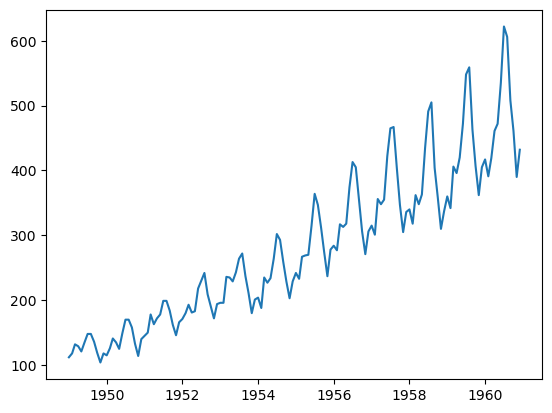

In [10]:
plt.plot(df2)

## To determine the time series is stationary, two tests are used:
* Rolling Statistics
* ADCF Test

In [11]:
# Rolling test
rol_mean,=df2.rolling(window=12).mean()  

rol_std=df2.rolling(window=12).std()
print(rol_mean,rol_std)

# window 12 means forcasting will be on monthly level , it were for days, 
# it would have been 365.


#Passengers             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


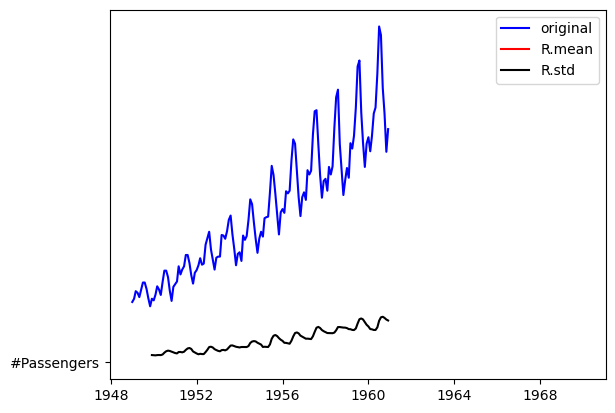

In [12]:
orig=plt.plot(df2, color='blue', label='original')
mean=plt.plot(rol_mean, color='red', label='R.mean')
std=plt.plot(rol_std, color='black', label='R.std')
plt.legend(loc='best')
plt.show(block=False)

In [13]:
# Now Dicky-Fuller test
from statsmodels.tsa.stattools import adfuller

In [14]:
dftest=adfuller(df2['#Passengers'], autolag="AIC")

dfoutput=pd.Series(dftest[0:4], index=['Test_statistic','p-value','#lags-used','number_of_obs used'])

for key ,value in dftest[4].items():
    dfoutput['critical value (%s)' %key]=value

print(dfoutput)

Test_statistic            0.815369
p-value                   0.991880
#lags-used               13.000000
number_of_obs used      130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
dtype: float64


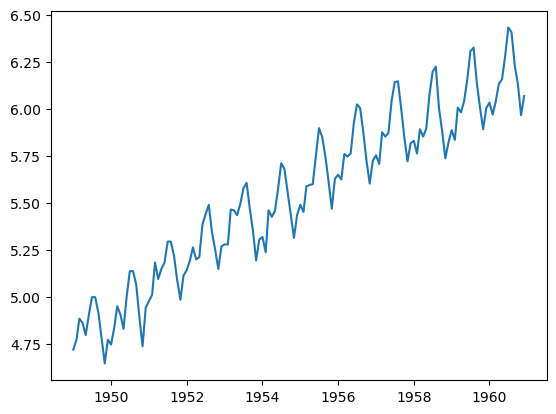

In [15]:
df2_log=np.log(df2)
plt.plot(df2_log)

In [16]:
df2_log.head()  
# you can see the passengers values are being scaled by use of log function

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791


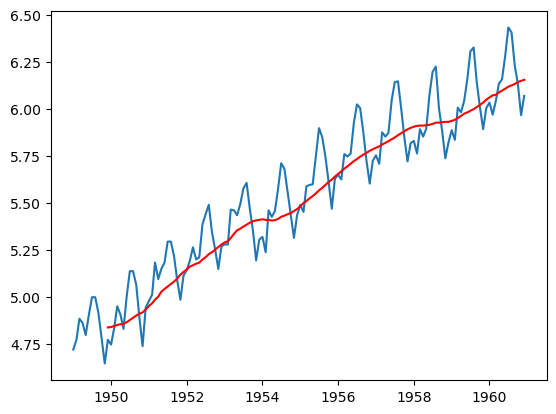

In [17]:
# Now if we put above scaled values in rolling statistics lets see what
# we get
movingavg=df2_log.rolling(window=12).mean()
movingstd=df2_log.rolling(window=12).std()
plt.plot(df2_log)
plt.plot(movingavg, color='red')

# trend is moving upward so it is not stationary. So above sacling method fails

In [18]:
# Another method to get thongs stationary is the difference 

df3_logavg=df2_log - movingavg
df3_logavg.head()
df3_logavg.dropna(inplace=True)
df3_logavg.head()


,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [19]:
def test_stationarity(timeseries):
    movingavg=timeseries.rolling(window=12).mean()
    movingstd=timeseries.rolling(window=12).std()
    
    orig=plt.plot(timeseries, color='blue', label='original')
    mean=plt.plot(movingavg, color='red', label='R.mean')
    std=plt.plot(movingstd, color='black', label='R.std')
    plt.legend(loc='best')
    plt.show(block=False)
    
    
    dftest=adfuller(timeseries['#Passengers'], autolag="AIC")

    dfoutput=pd.Series(dftest[0:4], index=['Test_statistic','p-value','#lags-used','number_of_obs used'])

    for key ,value in dftest[4].items():
        dfoutput['critical value (%s)' %key]=value
    print(dfoutput)



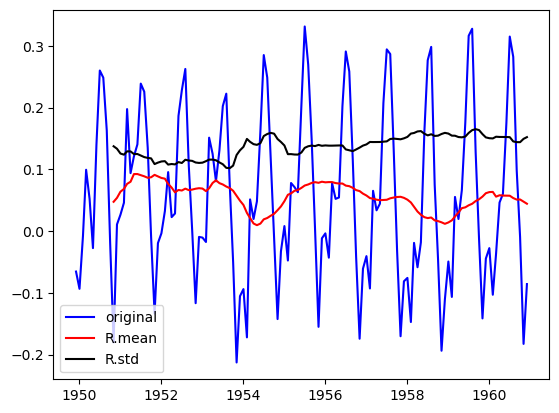

Test_statistic           -3.162908
p-value                   0.022235
#lags-used               13.000000
number_of_obs used      119.000000
critical value (1%)      -3.486535
critical value (5%)      -2.886151
critical value (10%)     -2.579896
dtype: float64


In [20]:
test_stationarity(df3_logavg)

## Next is to calculate weighted average of times series so that we can see the trend in time series

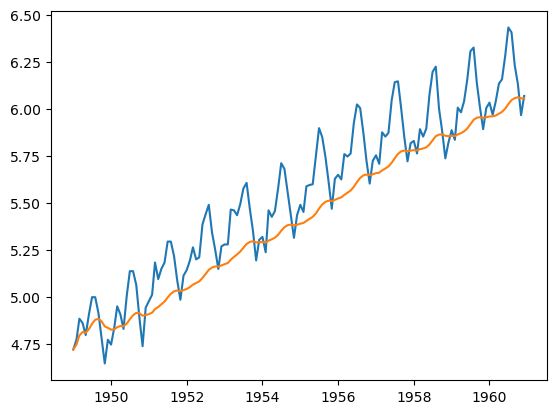

In [21]:
wats=df2_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(df2_log)
plt.plot(wats)

## Another transformation to make things stationary

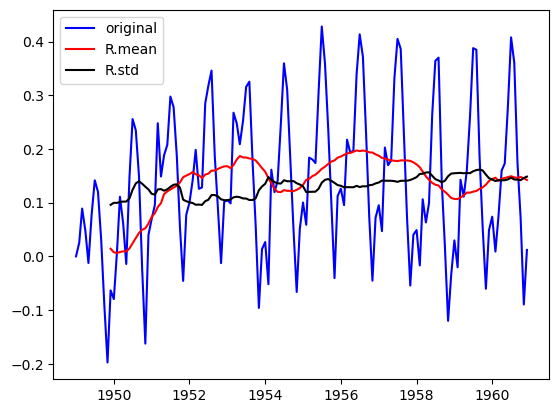

Test_statistic           -3.601262
p-value                   0.005737
#lags-used               13.000000
number_of_obs used      130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
dtype: float64


In [22]:
wats2=df2_log-wats
test_stationarity(wats2)

## Another transformation

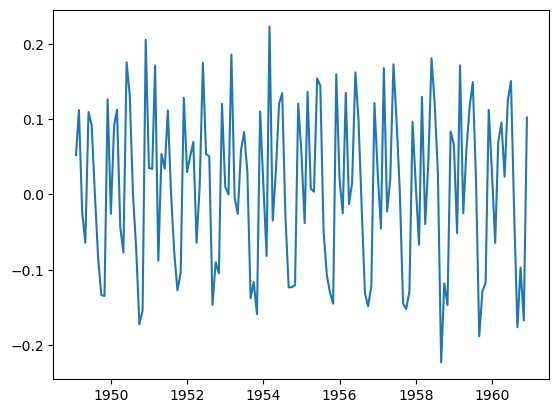

In [23]:
shift=df2_log-df2_log.shift()
plt.plot(shift)

#the values are differentiated by 1 so d is 1

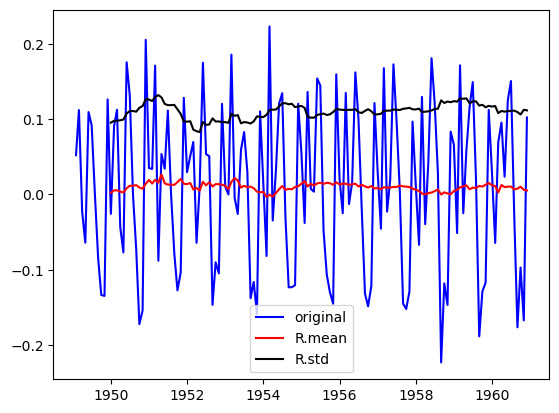

Test_statistic           -2.717131
p-value                   0.071121
#lags-used               14.000000
number_of_obs used      128.000000
critical value (1%)      -3.482501
critical value (5%)      -2.884398
critical value (10%)     -2.578960
dtype: float64


In [24]:
shift.dropna(inplace=True)
test_stationarity(shift)


# Now we can say that time series is stationary now because of the flat mean and std lines

## lets see the components of time series

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

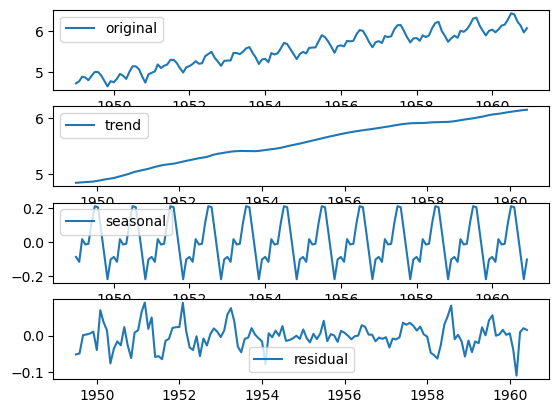

In [26]:
deco=seasonal_decompose(df2_log)

trend=deco.trend
seasonal=deco.seasonal
residual=deco.resid

plt.subplot(411)
plt.plot(df2_log, label='original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='residual')
plt.legend(loc='best')


plt.show()

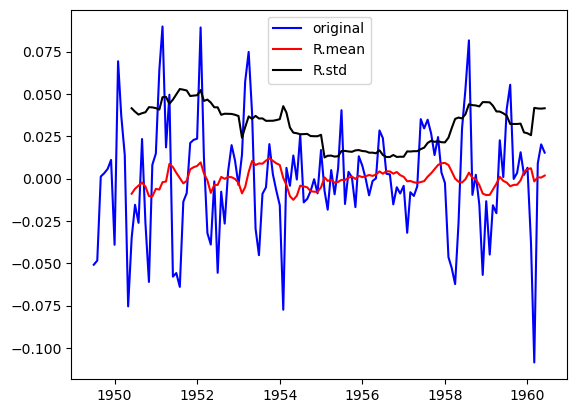

not working


In [27]:
try:
    dfr=residual
    dfr.dropna(inplace=True)
    test_stationarity(dfr)
except:
    print('not working')

## Now to use ARIMA model we need to find p and q values whic can be determined by acf and pacf graphs

In [28]:
from statsmodels.tsa.stattools import acf, pacf

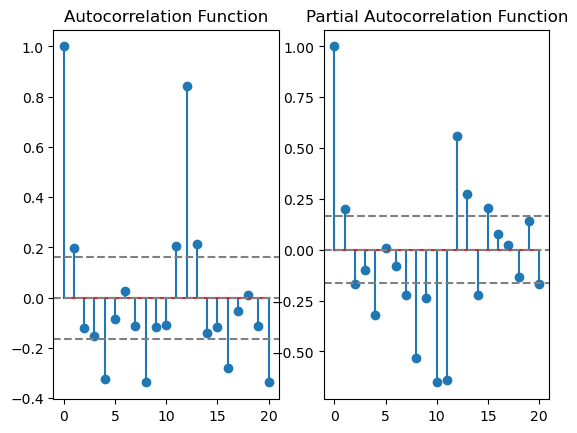

In [29]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
np.random.seed(123)


# Compute ACF and PACF
acf, ci = sm.tsa.stattools.acf(shift, nlags=20, alpha=0.05)
pacf, ci = sm.tsa.stattools.pacf(shift, nlags=20, alpha=0.05)

# Plot ACF
plt.subplot(1, 2, 1)
plt.stem(acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(shift)), linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(shift)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

# Plot PACF
plt.subplot(1, 2, 2)
plt.stem(pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(shift)), linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(shift)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')

# Show the plot
plt.show()

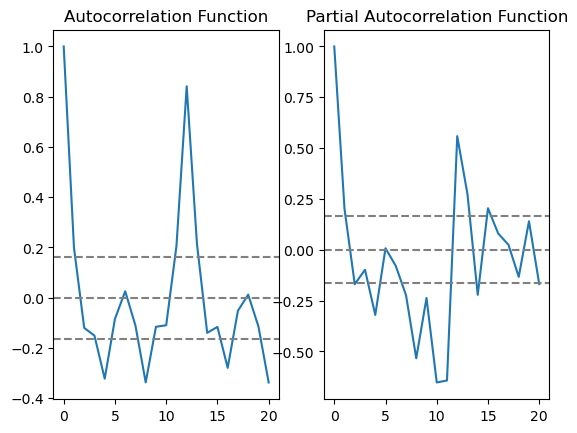

In [50]:
acf, ci = sm.tsa.stattools.acf(shift, nlags=20, alpha=0.05)
pacf, ci = sm.tsa.stattools.pacf(shift, nlags=20, alpha=0.05)

# Plot ACF
plt.subplot(121)
plt.plot(acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(shift)), linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(shift)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

# Plot PACF
plt.subplot(122)
plt.plot(pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(shift)), linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(shift)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')

# Show the plot
plt.show()


# the line where it first drops to zero point corresponds to p and q value which 2 in both case

In [34]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df2_log, order=(2,1,2))

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [35]:

res1=model.fit(disp=-1)
plt.plot(shift)
plt.plot(res1.fittedvalues,color='red')
plt.title('RSS:%.4f'%sum((res1.fittedvalues - shift['#Passengers'])**2))

TypeError: fit() got an unexpected keyword argument 'disp'

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 128.890
Date:                Fri, 17 Mar 2023   AIC                           -247.780
Time:                        06:21:44   BIC                           -232.965
Sample:                    01-01-1949   HQIC                          -241.760
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2432      0.166      1.469      0.142      -0.081       0.568
ar.L2          0.2676      0.199      1.344      0.179      -0.123       0.658
ma.L1         -0.0867      0.118     -0.732      0.4

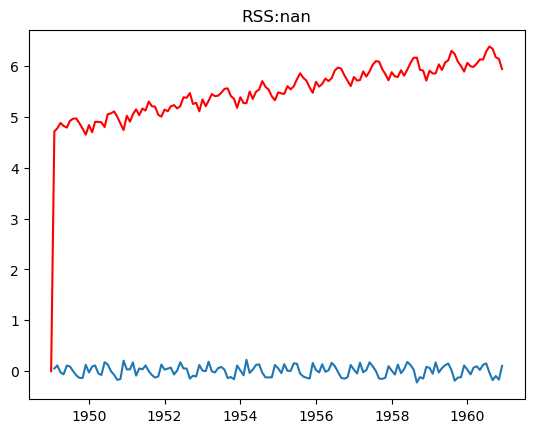

In [39]:
res1 = model.fit()

plt.plot(shift)
plt.plot(res1.fittedvalues,color='red')
plt.title('RSS:%.4f'% sum((res1.fittedvalues - shift['#Passengers'])**2))

print(res1.summary())

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


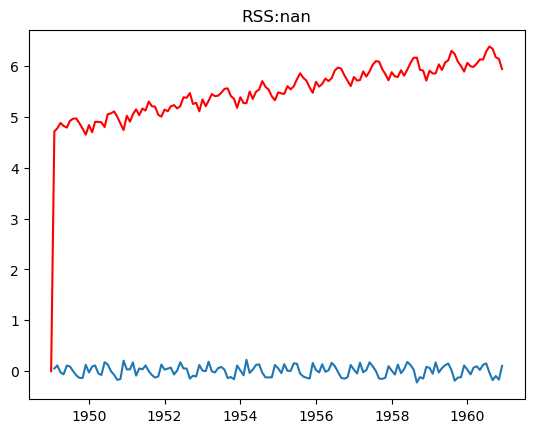

In [40]:
model = ARIMA(df2_log, order=(0,1,2))
res2 = model.fit()

plt.plot(shift)
plt.plot(res1.fittedvalues,color='red')
plt.title('RSS:%.4f'% sum((res2.fittedvalues - shift['#Passengers'])**2))

plt.show()


In [44]:
pred=pd.Series(res1.fittedvalues, copy=True)
pred.head()

Month
1949-01-01    0.000000
1949-02-01    4.718499
1949-03-01    4.776386
1949-04-01    4.883218
1949-05-01    4.824420
dtype: float64

In [45]:
pred1=pred.cumsum()
pred1.head()

Month
1949-01-01     0.000000
1949-02-01     4.718499
1949-03-01     9.494885
1949-04-01    14.378103
1949-05-01    19.202523
dtype: float64

In [48]:
pred_log = pd.Series(df2_log['#Passengers'].iloc[0], index=df2_log.index)
pred_log = pred_log.add(pred1, fill_value=0)
pred_log.head()

Month
1949-01-01     4.718499
1949-02-01     9.436998
1949-03-01    14.213384
1949-04-01    19.096602
1949-05-01    23.921022
dtype: float64

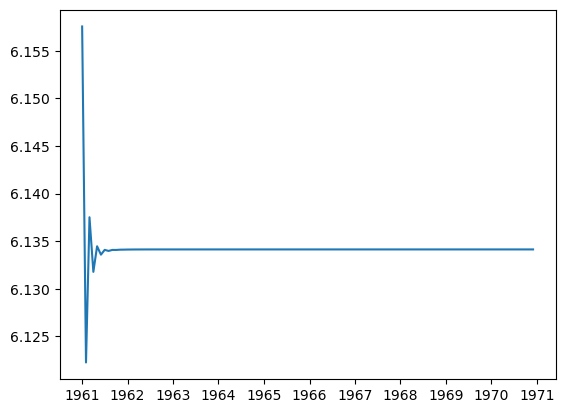

In [53]:
forecast = res1.forecast(steps=120)

# Plot the forecasted values
import matplotlib.pyplot as plt
plt.plot(forecast)
plt.show()